In [ ]:
#The project correctly applies unsupervised K-Means clustering on scaled Spotify audio features, uses PCA only for visualization,
#and interprets clusters statistically to identify premium song groups.

In [7]:
import pandas as pd
import numpy as np

In [8]:
df = pd.read_csv("/content/spotify dataset.csv")# Data Loading
df

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.102000,0.000000,0.0653,0.5180,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.072400,0.004210,0.3570,0.6930,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.079400,0.000023,0.1100,0.6130,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.028700,0.000009,0.2040,0.2770,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.080300,0.000000,0.0833,0.7250,123.976,189052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32828,7bxnKAamR3snQ1VGLuVfC1,City Of Lights - Official Radio Edit,Lush & Simon,42,2azRoBBWEEEYhqV6sb7JrT,City Of Lights (Vocal Mix),2014-04-28,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,2,-1.814,1,0.0936,0.076600,0.000000,0.0668,0.2100,128.170,204375
32829,5Aevni09Em4575077nkWHz,Closer - Sultan & Ned Shepard Remix,Tegan and Sara,20,6kD6KLxj7s8eCE3ABvAyf5,Closer Remixed,2013-03-08,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,0,-4.462,1,0.0420,0.001710,0.004270,0.3750,0.4000,128.041,353120
32830,7ImMqPP3Q1yfUHvsdn7wEo,Sweet Surrender - Radio Edit,Starkillers,14,0ltWNSY9JgxoIZO4VzuCa6,Sweet Surrender (Radio Edit),2014-04-21,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,6,-4.899,0,0.0481,0.108000,0.000001,0.1500,0.4360,127.989,210112
32831,2m69mhnfQ1Oq6lGtXuYhgX,Only For You - Maor Levi Remix,Mat Zo,15,1fGrOkHnHJcStl14zNx8Jy,Only For You (Remixes),2014-01-01,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,2,-3.361,1,0.1090,0.007920,0.127000,0.3430,0.3080,128.008,367432


In [9]:
df.isnull().sum()

,0
track_id,0
track_name,5
track_artist,5
track_popularity,0
track_album_id,0
track_album_name,5
track_album_release_date,0
playlist_name,0
playlist_id,0
playlist_genre,0


In [10]:
df.dropna(inplace=True)


In [11]:
#removing duplicate songs
df.drop_duplicates(inplace = True)

In [12]:
#numerical features for clustering
features = ['track_popularity', 'key', 'loudness', 'mode', 'speechiness',
            'acousticness','instrumentalness','liveness',
            'valence','tempo','duration_ms']
X = df[features]

In [13]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


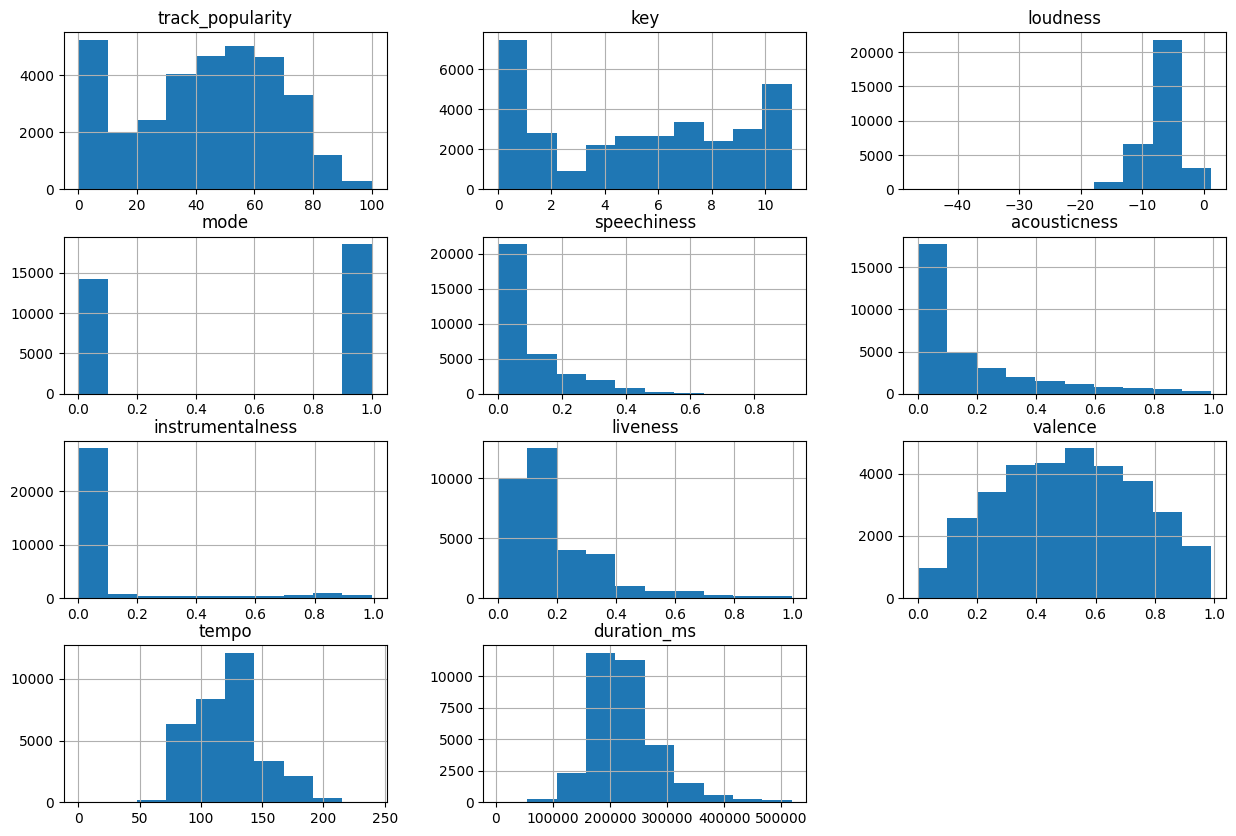

In [14]:
import matplotlib.pyplot as plt
X.hist(figsize=(15,10))#width, height
plt.show()

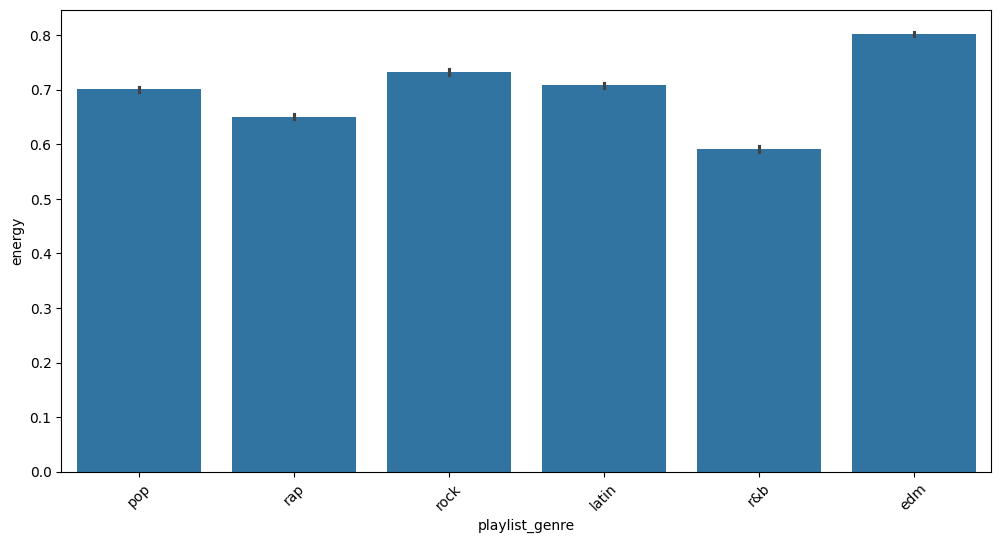

In [15]:
#Genre-wise Comparison
import seaborn as sns
plt.figure(figsize=(12,6))
sns.barplot(x='playlist_genre', y='energy', data=df)
plt.xticks(rotation=45)
plt.show()

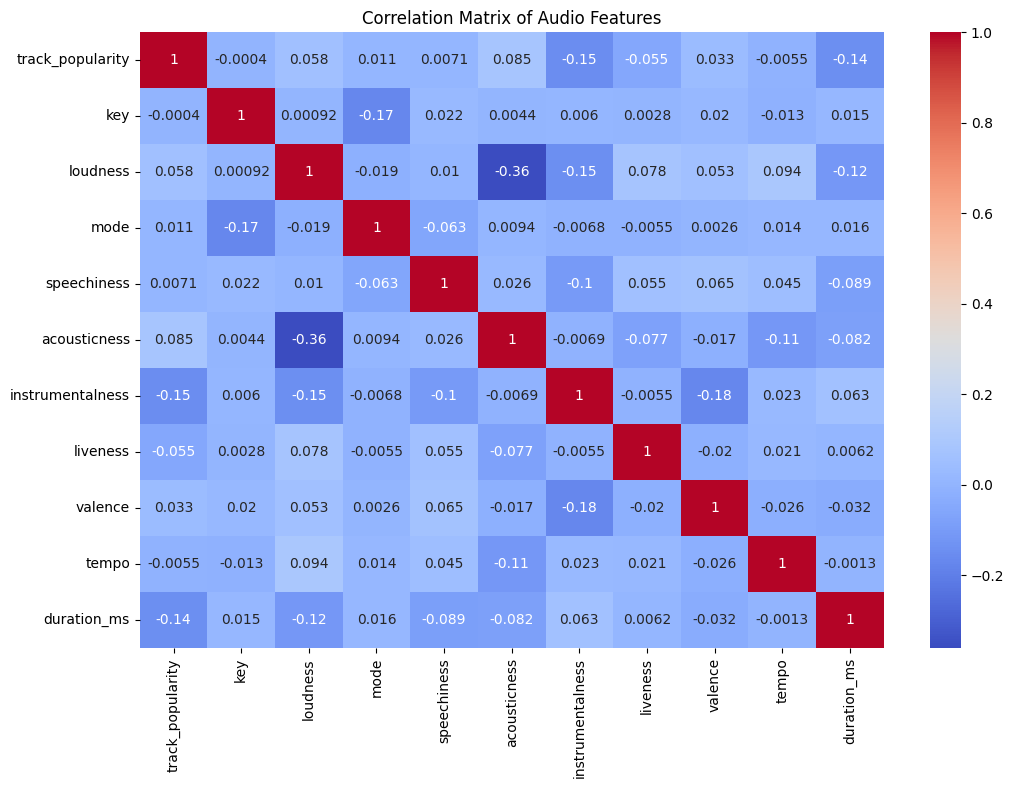

In [16]:
plt.figure(figsize=(12,8))
sns.heatmap(df[features].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Audio Features")
plt.show()


In [17]:
#clustering
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 5)
km.fit(df[['track_popularity', 'key', 'loudness', 'mode', 'speechiness',
            'acousticness','instrumentalness','liveness',
            'valence','tempo','duration_ms']])

KMeans(n_clusters=5)

In [18]:
km.cluster_centers_

array([[ 4.12207733e+01,  5.35684318e+00, -6.89813358e+00,
         5.74668330e-01,  1.04036705e-01,  1.73081067e-01,
         6.18745271e-02,  1.88137982e-01,  5.20391498e-01,
         1.20154048e+02,  2.48307037e+05],
       [ 4.50489139e+01,  5.32711183e+00, -6.83536106e+00,
         5.50603379e-01,  1.27839276e-01,  2.05812042e-01,
         1.28647083e-01,  1.90039469e-01,  5.02246650e-01,
         1.21349523e+02,  1.55783617e+05],
       [ 2.92614634e+01,  5.61365854e+00, -8.40997854e+00,
         5.88292683e-01,  8.13825366e-02,  1.34350326e-01,
         2.93721806e-01,  1.90880585e-01,  4.30603707e-01,
         1.22473149e+02,  4.16031006e+05],
       [ 4.51919563e+01,  5.36977743e+00, -6.14653339e+00,
         5.62592737e-01,  1.02743756e-01,  1.69961755e-01,
         5.47767004e-02,  1.89575033e-01,  5.16723155e-01,
         1.21230009e+02,  2.03117204e+05],
       [ 3.59407164e+01,  5.43693239e+00, -7.55441524e+00,
         5.73915237e-01,  1.01735520e-01,  1.60657527e-01,
  

In [19]:
df["cluster_group"] = km.labels_
df

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,cluster_group
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,-2.634,1,0.0583,0.102000,0.000000,0.0653,0.5180,122.036,194754,3
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,-4.969,1,0.0373,0.072400,0.004210,0.3570,0.6930,99.972,162600,1
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,-3.432,0,0.0742,0.079400,0.000023,0.1100,0.6130,124.008,176616,1
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,-3.778,1,0.1020,0.028700,0.000009,0.2040,0.2770,121.956,169093,1
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,-4.672,1,0.0359,0.080300,0.000000,0.0833,0.7250,123.976,189052,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32828,7bxnKAamR3snQ1VGLuVfC1,City Of Lights - Official Radio Edit,Lush & Simon,42,2azRoBBWEEEYhqV6sb7JrT,City Of Lights (Vocal Mix),2014-04-28,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,-1.814,1,0.0936,0.076600,0.000000,0.0668,0.2100,128.170,204375,3
32829,5Aevni09Em4575077nkWHz,Closer - Sultan & Ned Shepard Remix,Tegan and Sara,20,6kD6KLxj7s8eCE3ABvAyf5,Closer Remixed,2013-03-08,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,-4.462,1,0.0420,0.001710,0.004270,0.3750,0.4000,128.041,353120,4
32830,7ImMqPP3Q1yfUHvsdn7wEo,Sweet Surrender - Radio Edit,Starkillers,14,0ltWNSY9JgxoIZO4VzuCa6,Sweet Surrender (Radio Edit),2014-04-21,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,-4.899,0,0.0481,0.108000,0.000001,0.1500,0.4360,127.989,210112,3
32831,2m69mhnfQ1Oq6lGtXuYhgX,Only For You - Maor Levi Remix,Mat Zo,15,1fGrOkHnHJcStl14zNx8Jy,Only For You (Remixes),2014-01-01,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,-3.361,1,0.1090,0.007920,0.127000,0.3430,0.3080,128.008,367432,2


In [20]:
df["cluster_group"].value_counts()

,count
cluster_group,
3,12807
0,8833
1,6195
4,3968
2,1025


<Axes: xlabel='pca1', ylabel='pca2'>

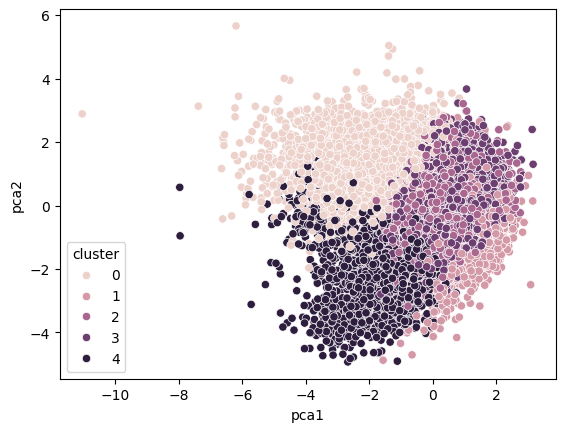

In [34]:
#PCA Scatter Plot
sns.scatterplot(
    x="pca1",
    y="pca2",
    hue="cluster",
    data=df
)


In [35]:
#premium cluster
df.groupby('cluster')[[
    'track_popularity',
    'energy',
    'danceability',
    'loudness',
    'valence'
]].mean().sort_values(by='track_popularity', ascending=False)


,track_popularity,energy,danceability,loudness,valence
cluster,,,,,
0,44.634803,0.457967,0.622204,-10.153041,0.437406
2,44.335588,0.732964,0.658116,-6.085944,0.542067
3,44.278398,0.723752,0.672875,-6.083057,0.535821
1,35.482893,0.763459,0.619260,-6.153633,0.503016
4,30.086924,0.749079,0.653928,-7.409712,0.383883


In [36]:
most_premium_users = df[df["cluster_group"]==2]
most_premium_users

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,cluster_group,cluster,pca1,pca2
837,5WtbtCmPbr8a9TkFSCx7nF,Not over Yet - Perfecto Edit,Grace,20,3g4niytYg05bBFEApZ1LVs,Digging In The Crates: 1997 Vol. 1,2007-01-30,90s Dance Hits,50cXvxgMGrvoUeLhkzCyIO,pop,...,0.004960,0.005970,0.0500,0.463,130.532,458058,2,3,-0.986634,-2.087221
900,7v4qvJHhz314Fcq0sLmyvR,Open Over Us (Live),Meredith Andrews,50,2GxghAKQPGO1E4Zl9nEgaV,Open Over Us (Live),2019-02-08,Christian Dance Party,37i9dQZF1DWUUPO0Sbx2CM,pop,...,0.112000,0.000000,0.0685,0.111,143.912,452389,2,2,-1.404182,-1.933810
1004,4StaGKzRGlYxAq1eXpsMr5,Skin - Rinzen Remix,Kidnap,45,4N4TQVcUrFJeZypUoR3XwN,Skin (Rinzen Remix),2018-08-24,Pop Dance Hits,7eERKCkgNKCCx5GYdeMIZf,pop,...,0.001920,0.082800,0.0825,0.288,123.008,450000,2,2,-1.216202,-2.050617
1075,2X485T9Z5Ly0xyaghN73ed,Let It Happen,Tame Impala,75,79dL7FLiJFOO0EoehUHQBv,Currents,2015-07-17,Ultimate Indie Presents... Best Indie Tracks o...,37i9dQZF1DWTHM4kX49UKs,pop,...,0.004620,0.026600,0.1110,0.577,125.012,467587,2,3,-0.083905,-1.268910
1109,3PFaFVWq5wucLu6s4baj9D,Girl,The Internet,67,69g3CtOVg98TPOwqmI2K7Q,Ego Death,2015-06-26,Ultimate Indie Presents... Best Indie Tracks o...,37i9dQZF1DWTHM4kX49UKs,pop,...,0.536000,0.124000,0.1010,0.453,79.890,415613,2,0,-2.376268,1.102389
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32780,3qC3qmZNDXu62hc8YbhWsy,Dear Boy,Avicii,7,02h9kO2oLKnLtycgbElKsw,True,2013-01-01,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,0.000276,0.100000,0.3000,0.253,124.995,479333,2,2,-0.785546,-3.169716
32807,1Ca2ELRlvACAeI7xz9c9jR,Spaceman,Hardwell,52,14SHciJYQ4DnKzprcUzE1z,Spaceman,2012-02-06,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,0.000262,0.794000,0.2410,0.118,127.997,379261,2,4,-1.047862,-3.310901
32814,7eVZbb7YlUopOeuiyRcJ7Z,Heartbeat (feat. Collin McLoughlin),Vicetone,1,6BVBm72Q7gLZUEm1fyoBB7,Monstercat 012 - Aftermath,2013-03-11,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,0.035000,0.000002,0.4600,0.217,127.996,393750,2,1,0.188494,-2.867469
32819,3H585qZxWJVpCIcvc0XhEP,Dawn - Hardwell Edit,Michael Brun,10,0utUWvjdQJMf0EFQCnaxml,Dawn,2012-01-02,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,0.000502,0.932000,0.0679,0.339,127.985,377930,2,4,-2.237575,-3.696405


In [28]:
kmeans = KMeans(n_clusters=5, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

df[['track_name', 'playlist_genre', 'cluster']].head()


,track_name,playlist_genre,cluster
0,I Don't Care (with Justin Bieber) - Loud Luxur...,pop,2
1,Memories - Dillon Francis Remix,pop,2
2,All the Time - Don Diablo Remix,pop,3
3,Call You Mine - Keanu Silva Remix,pop,2
4,Someone You Loved - Future Humans Remix,pop,2


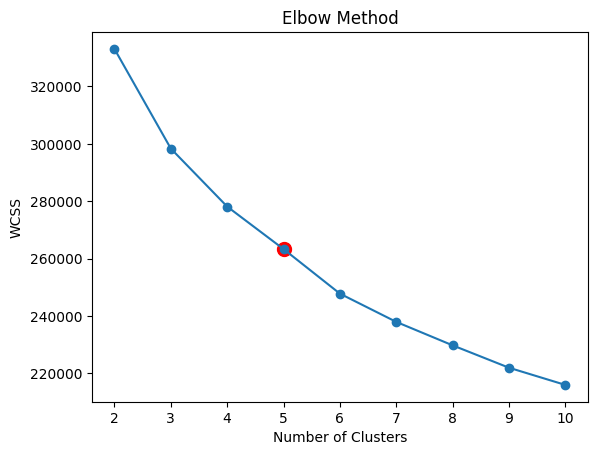

In [48]:
#Finding optimal number of clusters using Elbow Method
wcss = []
from sklearn.cluster import KMeans

for k in range(2,11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(2,11), wcss, marker='o')
plt.scatter(5, wcss[3], color='red', s=100, label='k=5')
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.show()


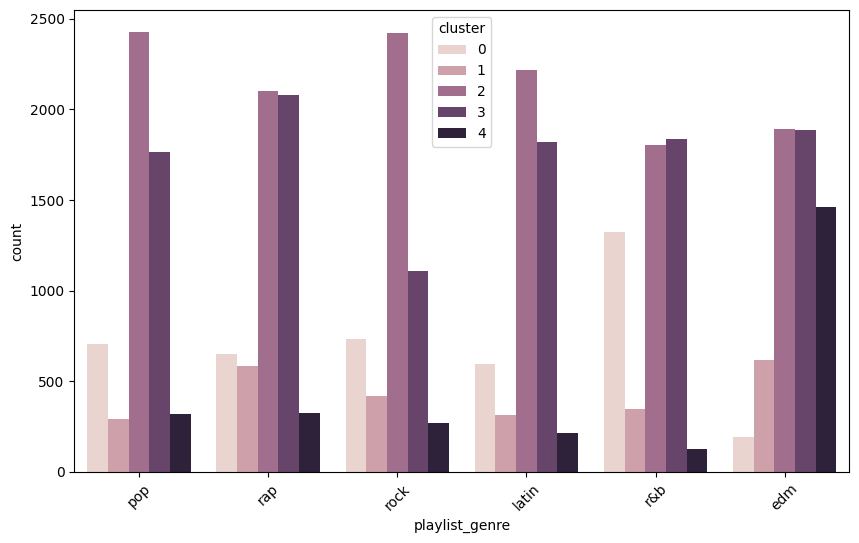

In [49]:
#Cluster vs Playlist Genre
plt.figure(figsize=(10,6))
sns.countplot(x='playlist_genre', hue='cluster', data=df)
plt.title("Cluster Distribution across Genres")
plt.xticks(rotation=45)
plt.show()


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


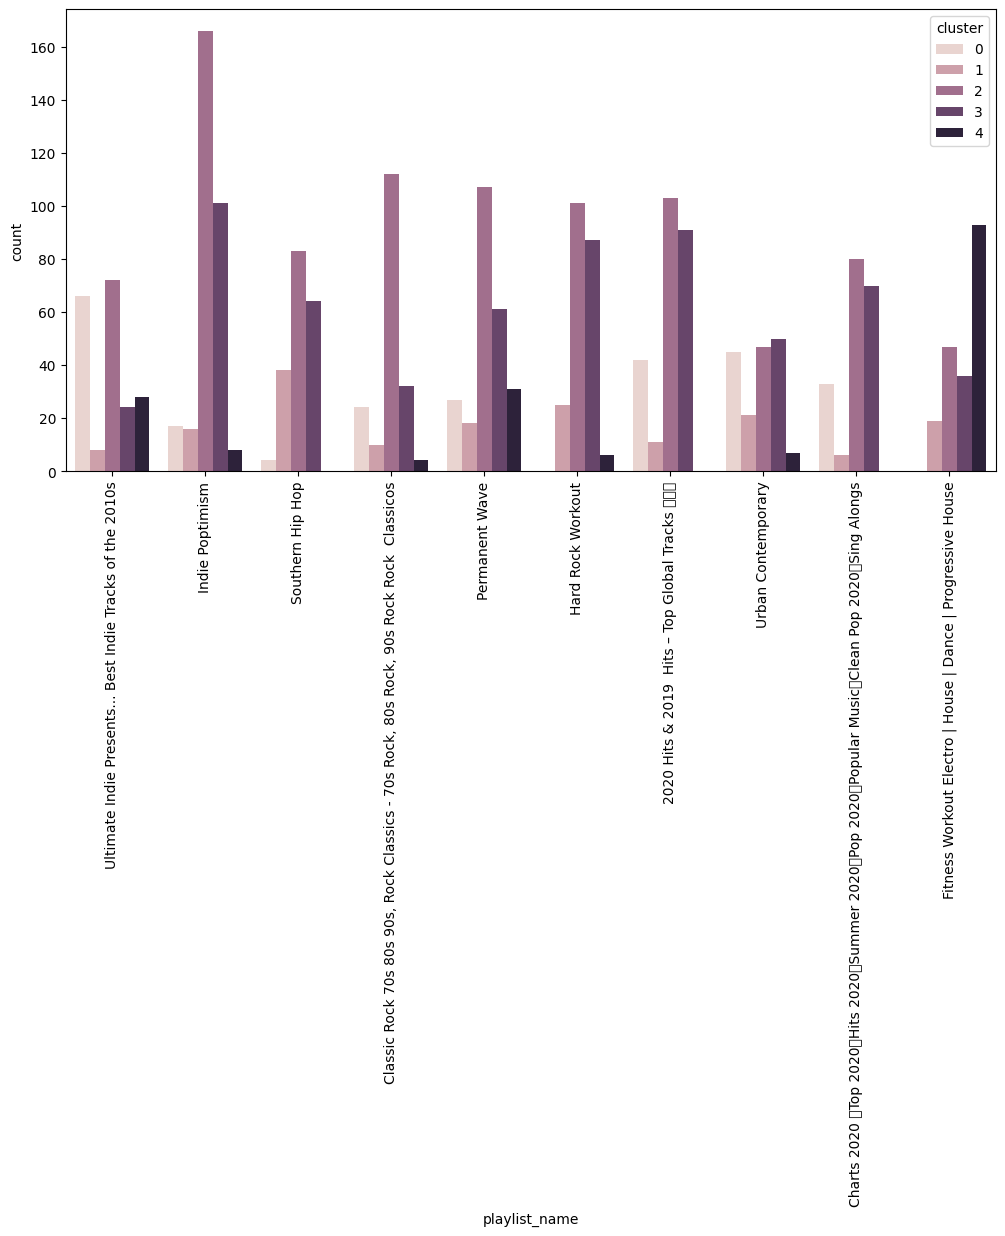

In [37]:
#Cluster vs Playlist Name
top_playlists = df['playlist_name'].value_counts().head(10).index

plt.figure(figsize=(12,6))
sns.countplot(
    x='playlist_name',
    hue='cluster',
    data=df[df['playlist_name'].isin(top_playlists)]
)
plt.xticks(rotation=90)
plt.show()


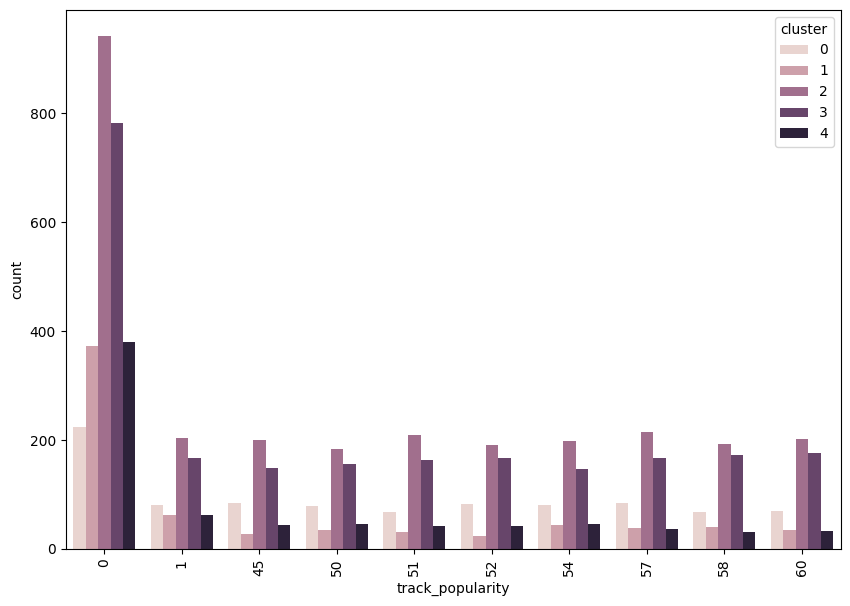

In [44]:
#popularity
top_playlists = df['track_popularity'].value_counts().head(10).index

plt.figure(figsize=(10,7))
sns.countplot(
    x='track_popularity',
    hue='cluster',
    data=df[df['track_popularity'].isin(top_playlists)]
)
plt.xticks(rotation=90)
plt.show()


In [41]:
def recommend_songs(song_name, df, n=5):
    if song_name not in df['track_name'].values:
        return "Song not found in dataset"

    cluster_id = df[df['track_name'] == song_name]['cluster'].values[0]

    recommendations = (
        df[df['cluster'] == cluster_id]
        .sample(n)
        [['track_name', 'track_artist', 'playlist_genre']]
    )

    return recommendations



In [46]:
recommend_songs("Call You Mine", df)


,track_name,track_artist,playlist_genre
30906,I'm Not Over (Radio Edit) [feat. Tash],Hellberg,edm
30773,Superhuman (feat. Eric Leva),SLANDER,edm
11624,A Tumba Abierta - Live,Miguel Rios,rock
24771,Groove Me,Guy,r&b
32162,Not Alone - CHRNS Remix,Sick Individuals,edm
